Grid search with cross validation
---

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='ovr', solver='liblinear'))
])

In [3]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create cross-validation object
grid = {
    'logreg__C': np.logspace(-4, 4, num=10)
}
grid_cv = GridSearchCV(pipe, grid, cv=5, return_train_score=True, verbose=1)

In [4]:
from sklearn import datasets

# Load data set
iris = datasets.load_iris()

# Create X/y arrays
X = iris['data']
y = iris['target']

# Fit estimator
grid_cv.fit(X, y)

# Get the results with "cv_results_"
grid_cv.cv_results_.keys()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logreg__C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [5]:
# Standard deviation of test scores
grid_cv.cv_results_['mean_test_score']

array([0.8       , 0.81333333, 0.82      , 0.82666667, 0.86      ,
       0.92      , 0.95333333, 0.96      , 0.96      , 0.96      ])

In [6]:
import pandas as pd

# Collect results in a DataFrame
cv_results = pd.DataFrame(grid_cv.cv_results_)

# Print a few interesting columns
cols = ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'param_logreg__C']
cv_results[cols].sort_values('mean_test_score', ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_logreg__C
7,0.960000,0.024944,0.966667,0.011785,166.81
8,0.960000,0.024944,0.975000,0.010541,1291.55
9,0.960000,0.024944,0.976667,0.013333,10000
6,0.953333,0.033993,0.963333,0.006667,21.5443
5,0.920000,0.061824,0.948333,0.011055,2.78256
4,0.860000,0.061101,0.881667,0.009718,0.359381
3,0.826667,0.057349,0.835000,0.015275,0.0464159
2,0.820000,0.080554,0.821667,0.020138,0.00599484
1,0.813333,0.077746,0.808333,0.018257,0.000774264
0,0.800000,0.066667,0.803333,0.017159,0.0001


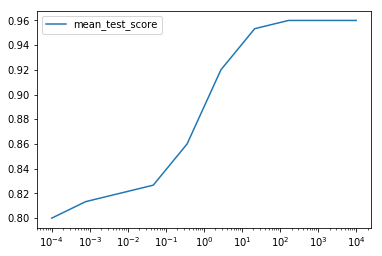

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot test curve
plt.semilogx(cv_results['param_logreg__C'], cv_results['mean_test_score'])
plt.legend()
plt.show()

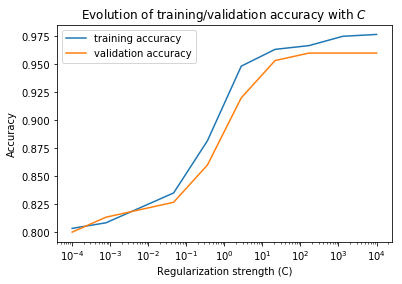

In [8]:
# Plot training/validation accuracy curves
plt.semilogx(cv_results["param_logreg__C"], cv_results["mean_train_score"], label='training accuracy')
plt.semilogx(cv_results["param_logreg__C"], cv_results["mean_test_score"],  label='validation accuracy')
plt.xlabel('Regularization strength (C)')
plt.ylabel('Accuracy')
plt.title("Evolution of training/validation accuracy with $C$")
plt.legend()
plt.show()

In [9]:
# Compute predictions with the "best_estimator_" attribute
grid_cv.best_estimator_.predict(X)

# Or with the grid search object directly
grid_cv.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
from sklearn.linear_model import LogisticRegressionCV

# Create estimator
logreg_cv = LogisticRegressionCV(
    Cs=[0.1, 1, 10], cv=5, multi_class='ovr', solver='liblinear')

In [11]:
from sklearn.preprocessing import scale

# Fit the estimator
logreg_cv.fit(scale(X), y);

In [12]:
# Scores for class 1 (setosa)
logreg_cv.scores_[0]

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [13]:
# Scores for class 2 (versicolor)
logreg_cv.scores_[1]

array([[0.66666667, 0.66666667, 0.63333333],
       [0.7       , 0.7       , 0.7       ],
       [0.66666667, 0.76666667, 0.73333333],
       [0.8       , 0.76666667, 0.76666667],
       [0.73333333, 0.76666667, 0.76666667]])

This time, the second column has slightly better results than the two other ones. We can see it by printing the mean scores

In [14]:
# Mean score per C value across folds
logreg_cv.scores_[1].mean(axis=0)

array([0.71333333, 0.73333333, 0.72      ])

In [15]:
print(logreg_cv.C_)

[ 0.1  1.  10. ]
